In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#creating a dataframe using pandas
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.tail()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#shape is used to get dimentions of data rows,coloumns
customer_data.shape

(200, 5)

In [6]:
customer_data.info()
#info() is used to get complete info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull()
#this is used to check if there is any any value

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#now i want select ony annual income and spending score for my analysis
customer_data.iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#we selected only annual income and spending colums from the data frame we created;

X = customer_data.iloc[:,[3,4]]

In [10]:
X = customer_data.iloc[:,[3,4]].values


In [11]:
X
#now we converted that colums into numpy arrays

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

WCSS -> is used to claculates the optimal no of cluster that can be formed on this data
     -> Within Clusters Sum of Squares

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state = 42)
    kmeans.fit(X)
    #inertia_ is used to get the WCSS value of the clusters formed
    wcss.append(kmeans.inertia_)

C:\Users\surya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


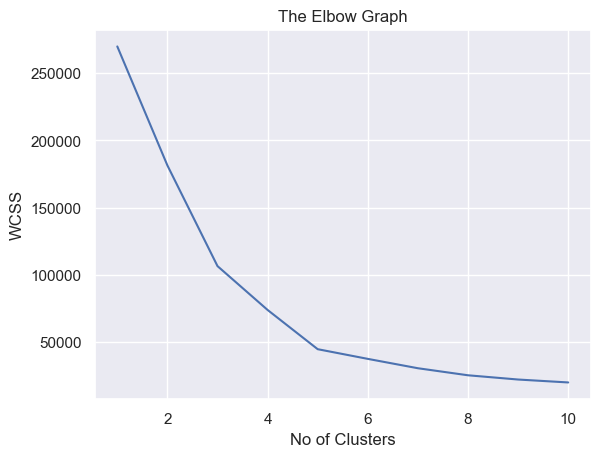

In [13]:
#plot the elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Graph")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

From th e elbow graph we can conclude that the optimal no of clusters are 5


kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)

#return the lable for each record for their cluster

Y = kmeans.fit_predict(X)

print(Y)
#these numbers re[resent the clusters they belong to

Visualizing all the clusters


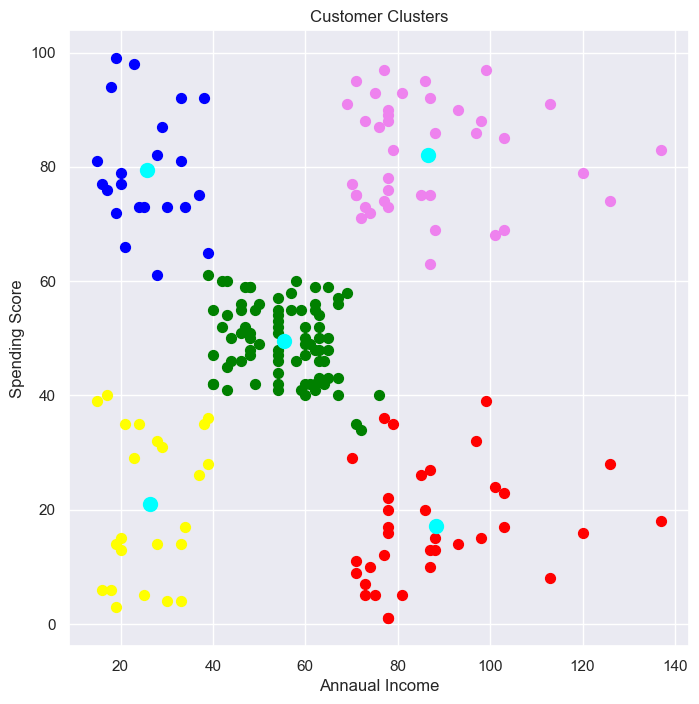

In [22]:
#ploting all the clusters along with centriods

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",label = "Cluster-1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="red",label = "Cluster-2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",label = "Cluster-3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="blue",label = "Cluster-4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="violet",label = "Cluster-5")

#plot the centriods

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="cyan",label="Centriods")
plt.title("Customer Clusters")
plt.xlabel("Annaual Income")
plt.ylabel("Spending Score")
plt.show()

Shift + TAB is used to check the parameters fof a function in jupiter notebook
